In [186]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

##### A. Base de données

In [187]:
df = pd.read_excel("beer_quality.xlsx")
df.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [188]:
X = df.iloc[:, :11]
X.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4


In [189]:
y = df.iloc[:, -1]
y.head()

0    5
1    5
2    5
3    6
4    5
Name: quality, dtype: int64

In [190]:
from sklearn.preprocessing import StandardScaler

sc = StandardScaler()

scaler = sc.fit(X)
X_scaled = scaler.transform(X)

print(X_scaled)

[[-0.52835961  0.96187667 -1.39147228 ...  1.28864292 -0.57920652
  -0.96024611]
 [-0.29854743  1.96744245 -1.39147228 ... -0.7199333   0.1289504
  -0.58477711]
 [-0.29854743  1.29706527 -1.18607043 ... -0.33117661 -0.04808883
  -0.58477711]
 ...
 [-1.1603431  -0.09955388 -0.72391627 ...  0.70550789  0.54204194
   0.54162988]
 [-1.39015528  0.65462046 -0.77526673 ...  1.6773996   0.30598963
  -0.20930812]
 [-1.33270223 -1.21684919  1.02199944 ...  0.51112954  0.01092425
   0.54162988]]


In [191]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.3, random_state=42)

data_train_df = (X_train, y_train)

data_test_df = (X_test, y_test)

##### B. Classification binaire

In [192]:
# Calcul de la médiane 
mediane = np.median(np.array(y_train))
mediane

6.0

In [193]:
ybin = []
for i in y:
    if(y[i] < mediane):
        ybin.append(0)
    else:
        ybin.append(1)
new_df = df.assign(y_bin = ybin)
new_df.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,y_bin
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,0
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5,0
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5,0
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6,0
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,0


In [194]:
del new_df['quality']
new_df.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,y_bin
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,0
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,0
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,0
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,0
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,0


In [195]:
X = new_df.iloc[:, :11]
X.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4


In [196]:
y = new_df.iloc[:, -1]
y.head()

0    0
1    0
2    0
3    0
4    0
Name: y_bin, dtype: int64

In [197]:
from sklearn.preprocessing import StandardScaler

sc = StandardScaler()

scaler = sc.fit(X)
X_scaled = scaler.transform(X)

print(X_scaled)

[[-0.52835961  0.96187667 -1.39147228 ...  1.28864292 -0.57920652
  -0.96024611]
 [-0.29854743  1.96744245 -1.39147228 ... -0.7199333   0.1289504
  -0.58477711]
 [-0.29854743  1.29706527 -1.18607043 ... -0.33117661 -0.04808883
  -0.58477711]
 ...
 [-1.1603431  -0.09955388 -0.72391627 ...  0.70550789  0.54204194
   0.54162988]
 [-1.39015528  0.65462046 -0.77526673 ...  1.6773996   0.30598963
  -0.20930812]
 [-1.33270223 -1.21684919  1.02199944 ...  0.51112954  0.01092425
   0.54162988]]


In [198]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.3, random_state=42)

data_train_df = (X_train, y_train)

data_test_df = (X_test, y_test)

###### Optimisation rapide d'un arbre de décision

In [199]:
from sklearn.tree import DecisionTreeClassifier

clf = DecisionTreeClassifier(random_state=0)

# Train Decision Tree Classifer
clf = clf.fit(X_train,y_train)

#Predict the response for test dataset
y_pred = clf.predict(X_test)

y_pred

array([0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0,
       1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0,
       1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0,
       1, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0,
       1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 1, 1,
       0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0,

###### Entraînement d'un ensemble d'arbre de décision "faibles" avec AdaBoost

In [200]:
from sklearn.ensemble import AdaBoostClassifier
from sklearn.svm import SVC
from sklearn import metrics
svc=SVC(probability=True, kernel='linear')

# Create adaboost classifer object
abc =AdaBoostClassifier(n_estimators=50, base_estimator=svc,learning_rate=1)

# Train Adaboost Classifer
model = abc.fit(X_train, y_train)

#Predict the response for test dataset
y_pred = model.predict(X_test)

# Model Accuracy, how often is the classifier correct?
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

Accuracy: 0.8583333333333333


In [201]:
#Predict the response for test dataset
y_pred = model.predict(X_train)
print("Accuracy:",metrics.accuracy_score(y_train, y_pred))

Accuracy: 0.8579088471849866


###### Visualisation de l'accuracy en fonction de n_estimators pour MAX_DEPTH = 1

In [202]:
from matplotlib import pyplot
from sklearn.metrics import accuracy_score

n_estimators = [25, 50, 75, 100, 125, 150]
accuracy_train = []

for i in range(len(n_estimators)):
    bdt = AdaBoostClassifier(
    DecisionTreeClassifier(max_depth=1), algorithm="SAMME", n_estimators=n_estimators[i]
    )

    # Train Adaboost Classifer
    model = bdt.fit(X_train, y_train)
    y_pred_tain = model.predict(X_train)
    accuracy_train.append(accuracy_score(y_train, y_pred_train))

In [203]:
from matplotlib import pyplot
n_estimators = [25, 50, 75, 100, 125, 150]
accuracy_test = []

for i in range(len(n_estimators)):
    bdt = AdaBoostClassifier(
    DecisionTreeClassifier(max_depth=1), algorithm="SAMME", n_estimators=n_estimators[i]
    )

    # Train Adaboost Classifer
    model = bdt.fit(X_train, y_train)
    accuracy_test.append(bdt.score(X_test, y_test))

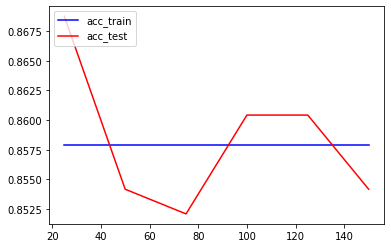

In [204]:
import pylab

pylab.plot(n_estimators, accuracy_train, '-b', label='acc_train')
pylab.plot(n_estimators, accuracy_test, '-r', label='acc_test')
pylab.legend(loc='upper left')
pylab.show()

###### Visualisation de l'accuracy en fonction de n_estimators pour MAX_DEPTH = 5

In [205]:
from matplotlib import pyplot
n_estimators = [25, 50, 75, 100, 125, 150]
accuracy_train = []

for i in range(len(n_estimators)):
    bdt = AdaBoostClassifier(
    DecisionTreeClassifier(max_depth=5), algorithm="SAMME", n_estimators=n_estimators[i]
    )

    # Train Adaboost Classifer
    model = bdt.fit(X_train, y_train)
    accuracy_train.append(bdt.score(X_train, y_train))

In [206]:
from matplotlib import pyplot
n_estimators = [25, 50, 75, 100, 125, 150]
accuracy_test = []

for i in range(len(n_estimators)):
    bdt = AdaBoostClassifier(
    DecisionTreeClassifier(max_depth=5), algorithm="SAMME", n_estimators=n_estimators[i]
    )

    # Train Adaboost Classifer
    model = bdt.fit(X_train, y_train)
    accuracy_test.append(bdt.score(X_test, y_test))

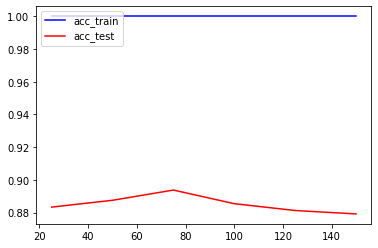

In [207]:
pylab.plot(n_estimators, accuracy_train, '-b', label='acc_train')
pylab.plot(n_estimators, accuracy_test, '-r', label='acc_test')
pylab.legend(loc='upper left')
pylab.show()

In [208]:
feature_names = [f"feature {i}" for i in range(X_scaled.shape[1])]
bdt = AdaBoostClassifier(
    DecisionTreeClassifier(max_depth=5), algorithm="SAMME", n_estimators=n_estimators[i]
)
model = bdt.fit(X_train, y_train)

AttributeError: 'numpy.ndarray' object has no attribute 'columns'

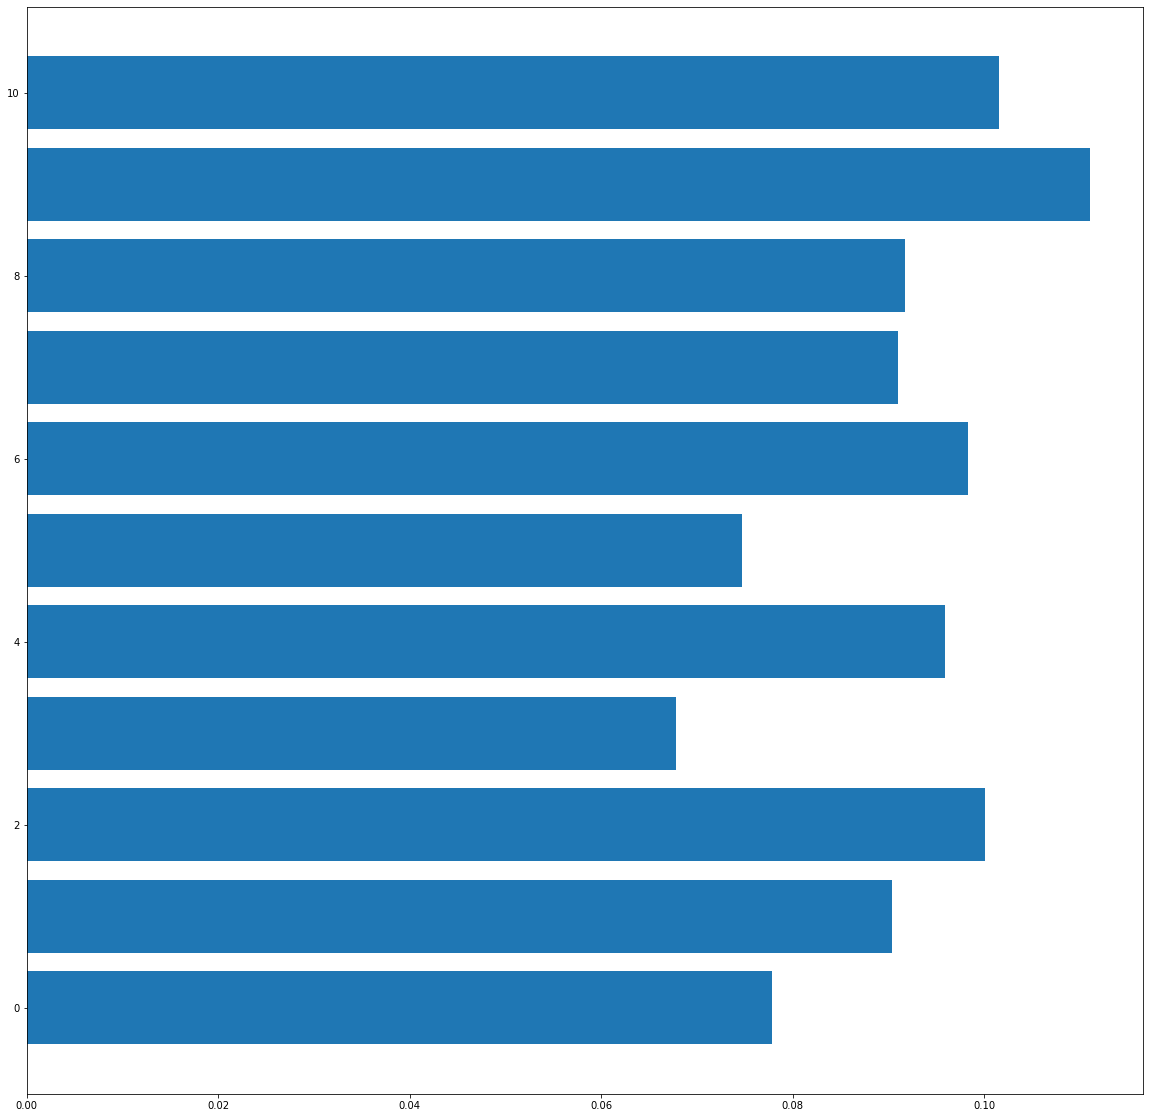

In [212]:
n_features = X_train.shape[1]
plt.figure(figsize=(20,20))
plt.barh(range(n_features), model.feature_importances_, align='center') 
plt.yticks(np.arange(n_features), X_train.columns) 
plt.xlabel('Feature importance')
plt.ylabel('Feature')
